In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# loading the dataset
df=pd.read_csv("laptop.csv")
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
# checking the last 5 rows5 rows
df.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [4]:
 # checking number of rows and columns
df.shape

(2160, 12)

In [5]:
 # checking the product of rows and columns
df.size

25920

In [6]:
 # checking the names of columns
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [7]:
 # checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [8]:
# getting the statistical summary
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [9]:
# checking the null values
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [10]:
# dropping the GPU column
df.drop(['GPU'], axis=1, inplace=True)

In [11]:
# dropping the null values
df.dropna(inplace=True)

In [12]:
# checking the duplicate values
df.duplicated().value_counts()

False    2114
Name: count, dtype: int64

In [13]:
# checking unique values
df.nunique()

Laptop          2114
Status             2
Brand             27
Model            119
CPU               27
RAM                9
Storage           11
Storage type       2
Screen            28
Touch              2
Final Price     1409
dtype: int64

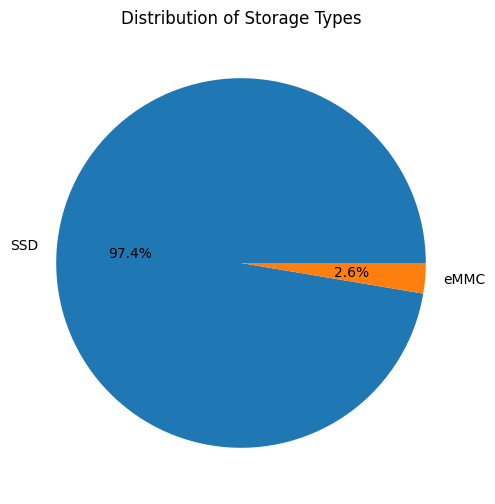

In [14]:
# 'Storage types' column - Pie chart
plt.figure(figsize=(8, 6))
sizes = df['Storage type'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribution of Storage Types')
plt.show()

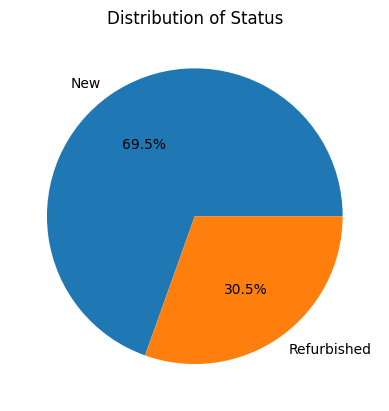

In [15]:
# 'Status' column - Pie chartplt.figure(figsize=(8, 6))
sizes = df['Status'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribution of Status')
plt.show()

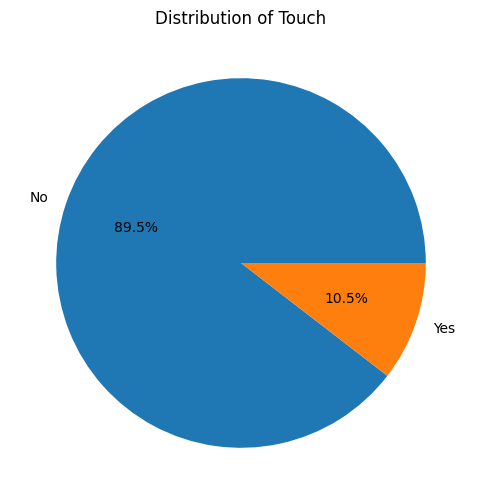

In [16]:
# 'Touch' column - Pie chart
plt.figure(figsize=(8, 6))
sizes = df['Touch'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribution of Touch')
plt.show()

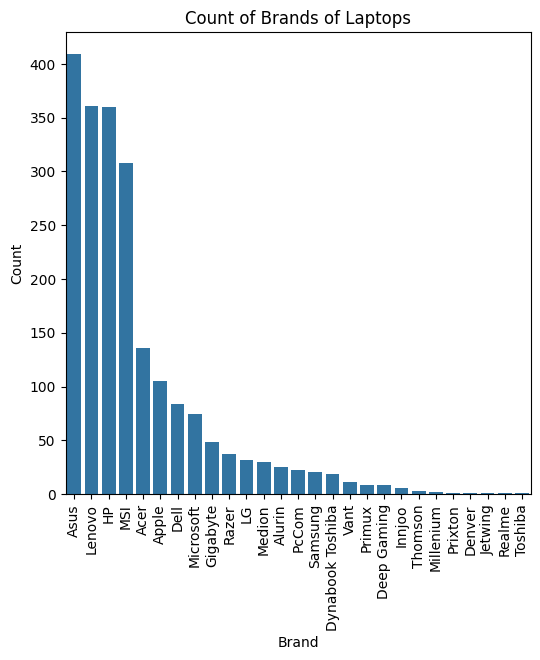

In [17]:
# 'Brand' column - Bar plot
plt.figure(figsize=(6, 6))
touch_counts = df['Brand'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Brands of Laptops')
plt.show()

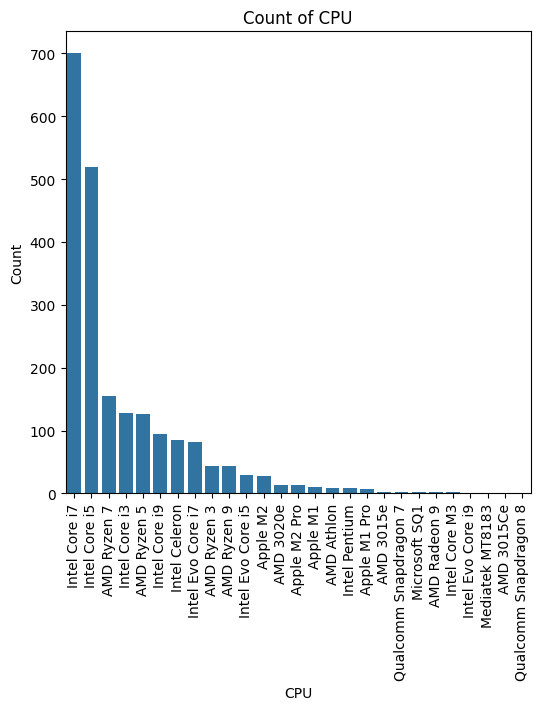

In [18]:
# 'CPU' column - Bar plot
plt.figure(figsize=(6, 6))
touch_counts = df['CPU'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('CPU')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of CPU')
plt.show()

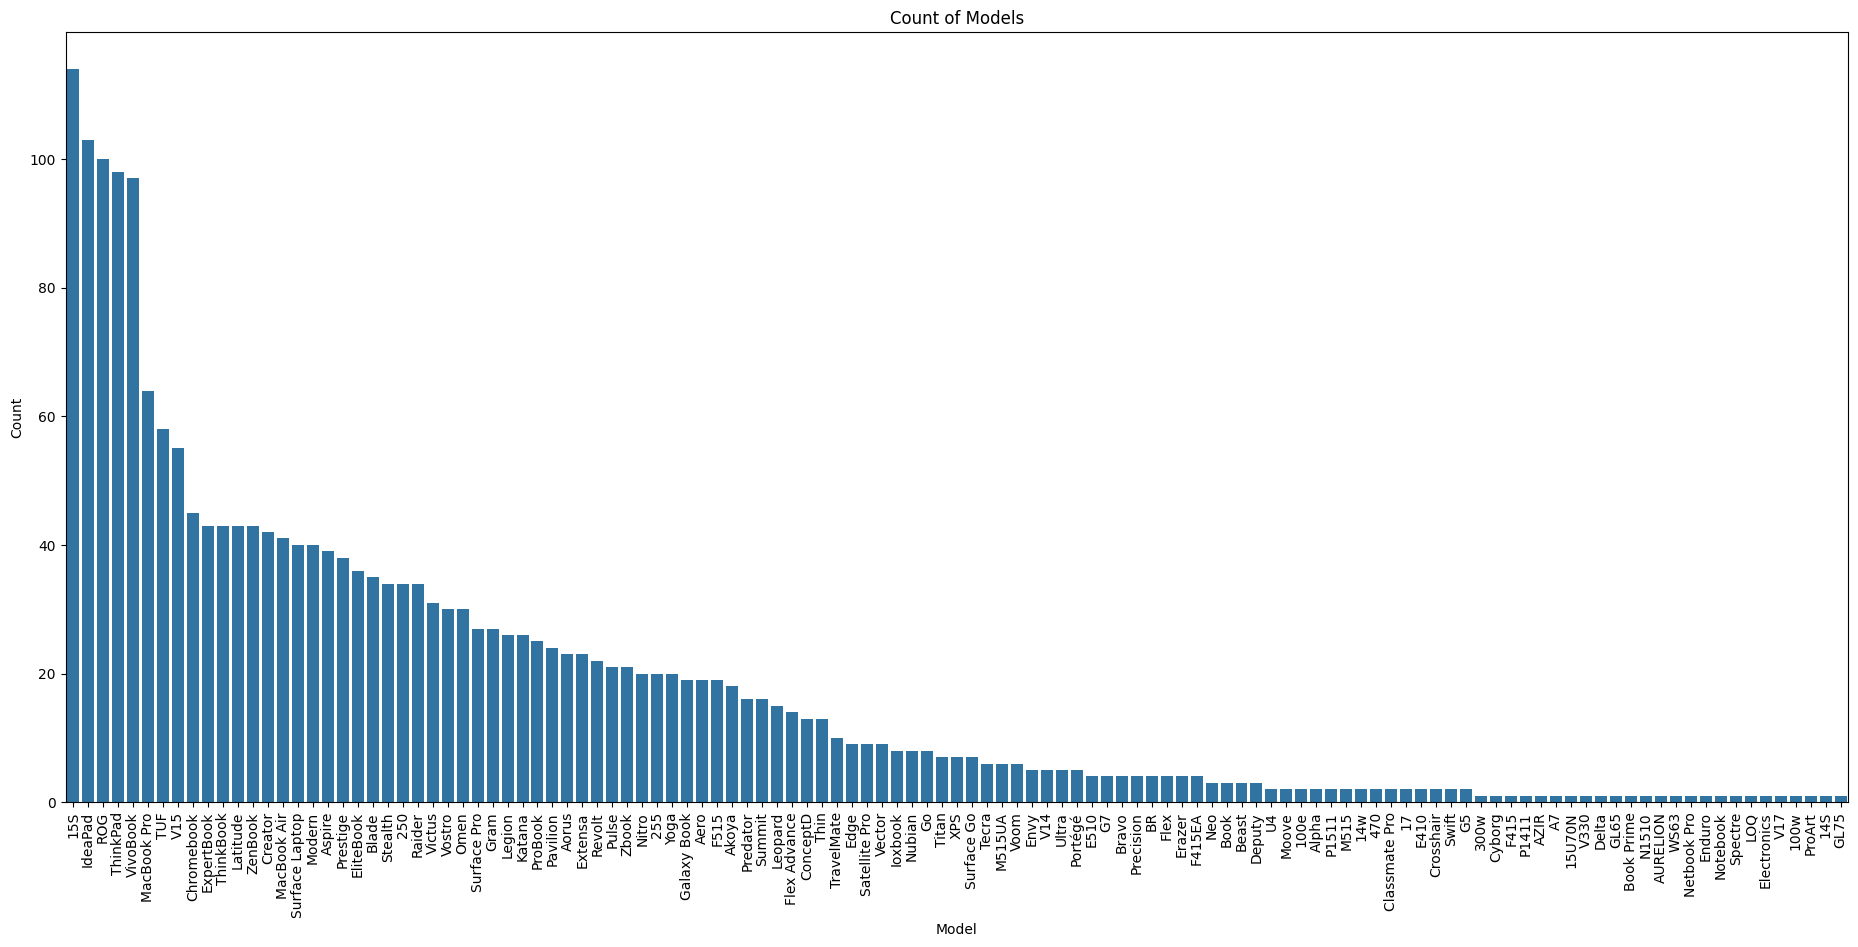

In [19]:
# 'Model' column - Bar plot
plt.figure(figsize=(23, 10))
touch_counts = df['Model'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Models')
plt.show()

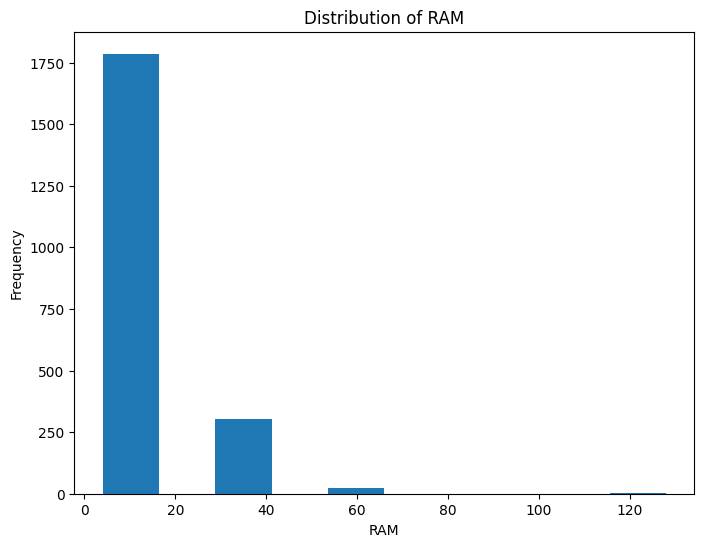

In [20]:
# 'RAM' column - Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['RAM'], bins=10)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Distribution of RAM')
plt.show()

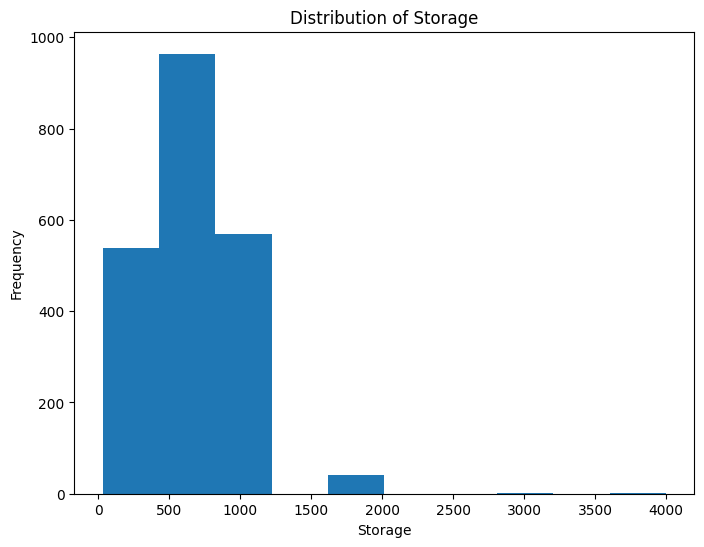

In [21]:
# 'Storage' column - Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Storage'], bins=10)
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.title('Distribution of Storage')
plt.show()

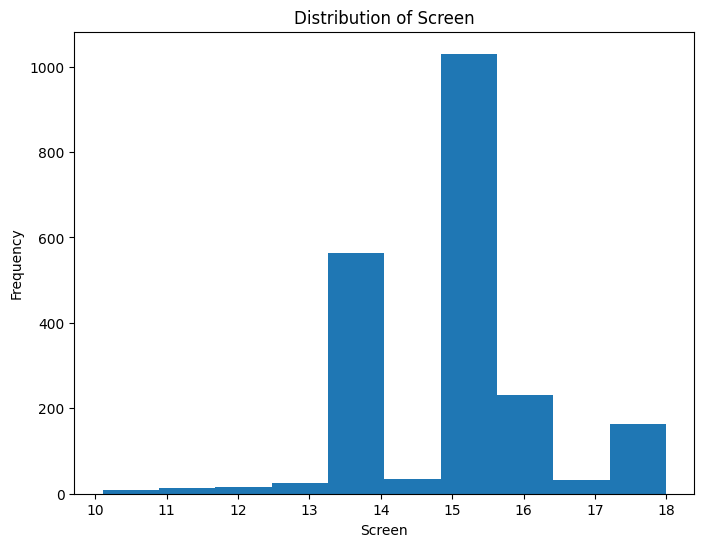

In [22]:
# 'Screen' column - Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Screen'], bins=10)
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.title('Distribution of Screen')
plt.show()

In [23]:
# Label encoding
label_encoder = LabelEncoder()
df['Status_encoded'] = label_encoder.fit_transform(df['Status'])
df['Storage_encoded'] = label_encoder.fit_transform(df['Storage type'])
df['Touch_encoded'] = label_encoder.fit_transform(df['Touch'])

In [24]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'Storage type', 'Touch'], dtype='object')
Index(['RAM', 'Storage', 'Screen', 'Final Price', 'Status_encoded',
       'Storage_encoded', 'Touch_encoded'],
      dtype='object')


In [25]:
df_dum = pd.get_dummies(df,columns=cat_cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(2114, 2293)
Index(['RAM', 'Storage', 'Screen', 'Final Price', 'Status_encoded',
       'Storage_encoded', 'Touch_encoded',
       'Laptop_ASUS BR1100FKA-BP1185XA Intel Celeron N4500/4GB/128GB SSD/11.6" Táctil',
       'Laptop_ASUS Chromebook C433TA-AJ0336 Intel Core m3-8100Y/8GB/64GB eMMC/14" Táctil',
       'Laptop_ASUS Chromebook CR1100FKA-BP0024 Intel Celeron N4500/4GB/32GB eMMC/11.6" Táctil',
       ...
       'CPU_Intel Evo Core i5', 'CPU_Intel Evo Core i7',
       'CPU_Intel Evo Core i9', 'CPU_Intel Pentium', 'CPU_Mediatek MT8183',
       'CPU_Microsoft SQ1', 'CPU_Qualcomm Snapdragon 7',
       'CPU_Qualcomm Snapdragon 8', 'Storage type_eMMC', 'Touch_Yes'],
      dtype='object', length=2293)


In [26]:
x = df_dum.drop('Final Price',axis=1)
y = np.log(df_dum['Final Price'])       
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2114, 2292)
(2114,)


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1691, 2292)
(423, 2292)
(1691,)
(423,)


In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared=False)
    r2s = r2_score(ytest,ypred)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,ypred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res, res_metrics

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [33]:
ypred_lr1 =  lr1.predict(x_test)

In [34]:
lr1_df,lr_res = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'LinReg')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,1.0,0.826033,0.074196,0.272389,0.200694


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [36]:
dt = DecisionTreeRegressor(max_depth=8,min_samples_split=10,min_samples_leaf=10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=10)

In [37]:
ypred_dt = dt.predict(x_test)

In [38]:
dt_df,dt_res = model_res(dt,x_train,x_test,y_train,y_test,ypred_dt,'DTree_Reg')
dt_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DTree_Reg,0.799701,0.721597,0.118737,0.344582,0.262354


In [39]:
rf = RandomForestRegressor(n_estimators=300,max_depth=10,min_samples_split=12)
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=10, min_samples_split=12, n_estimators=300)

In [40]:
ypred_rf =  rf.predict(x_test)

In [41]:
rf_df,rf_res = model_res(rf,x_train,x_test,y_train,y_test,ypred_rf,'RF_Reg')
rf_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg,0.872227,0.765584,0.099977,0.316191,0.238479


In [42]:
rf2 = RandomForestRegressor(n_estimators=300,max_depth=9,min_samples_split=4)
rf2.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_split=4, n_estimators=300)

In [43]:
ypred_rf1 =  rf.predict(x_test)

In [44]:
rf_df1,rf_re1s = model_res(rf2,x_train,x_test,y_train,y_test,ypred_rf1,'RF_Reg1')
rf_df1

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg1,0.865274,0.757759,0.099977,0.316191,0.238479


In [46]:
all_res = pd.concat([lr1_df,dt_df,rf_df,rf_df1])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,1.000000,0.826033,0.074196,0.272389,0.200694
DTree_Reg,0.799701,0.721597,0.118737,0.344582,0.262354
RF_Reg,0.872227,0.765584,0.099977,0.316191,0.238479
RF_Reg1,0.865274,0.757759,0.099977,0.316191,0.238479


In [50]:
actual_ypred_rf1 = ypred_rf1    

res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':actual_ypred_rf1})
res_df.sample(20)

,Actual_y_test,Pred
673,7.549083,7.463962
1606,8.515814,8.444311
1098,6.974479,7.032106
1886,6.587398,6.696483
1549,8.110103,7.556746
652,6.378426,6.474259
1695,7.494986,6.898070
556,7.911694,7.418571
752,7.639642,7.619710
161,6.395262,6.402541
